In [2]:
%reset -f
%matplotlib inline
%load_ext rpy2.ipython
import sys
sys.path.append('../')
import seaborn.apionly as sns
import matplotlib
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
import warnings
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
cancers = ["GBM", "KIRC", "BRCA"]
data = {}
for cancer in cancers:
    inputdir = "./data/%s/rna/" % cancer
    X = pd.read_csv(inputdir + 'X.csv')
    data[cancer] = X
    print("%s loaded: n=%s, p=%s" % (cancer, X.shape[0], X.shape[1]))

GBM loaded: n=168, p=20531
KIRC loaded: n=605, p=20531
BRCA loaded: n=1211, p=20531


GBM


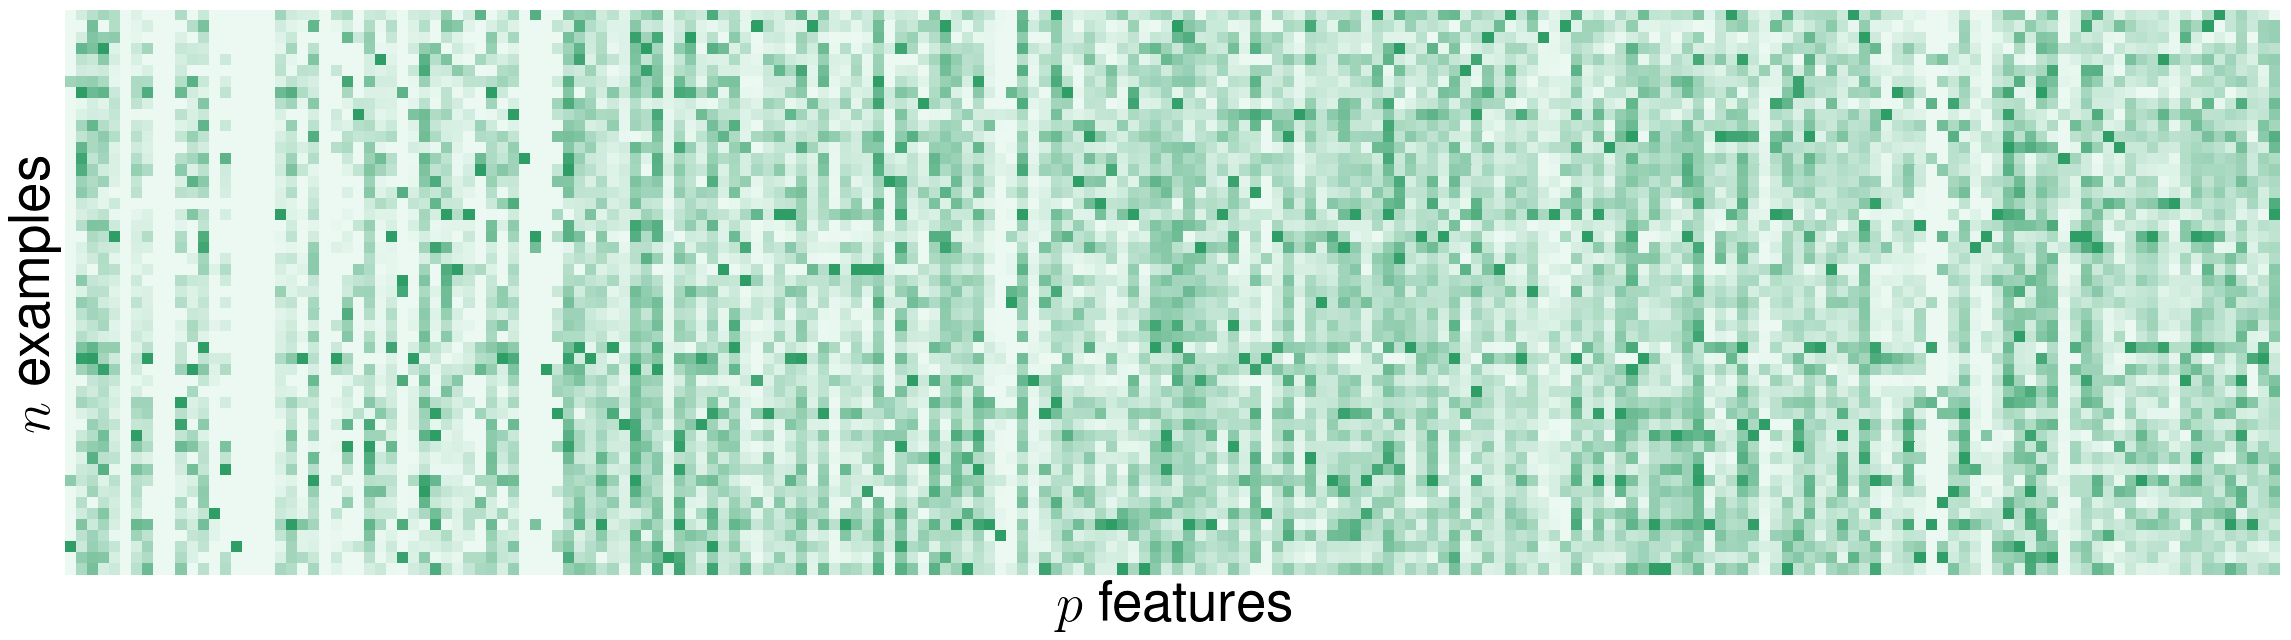

KIRC


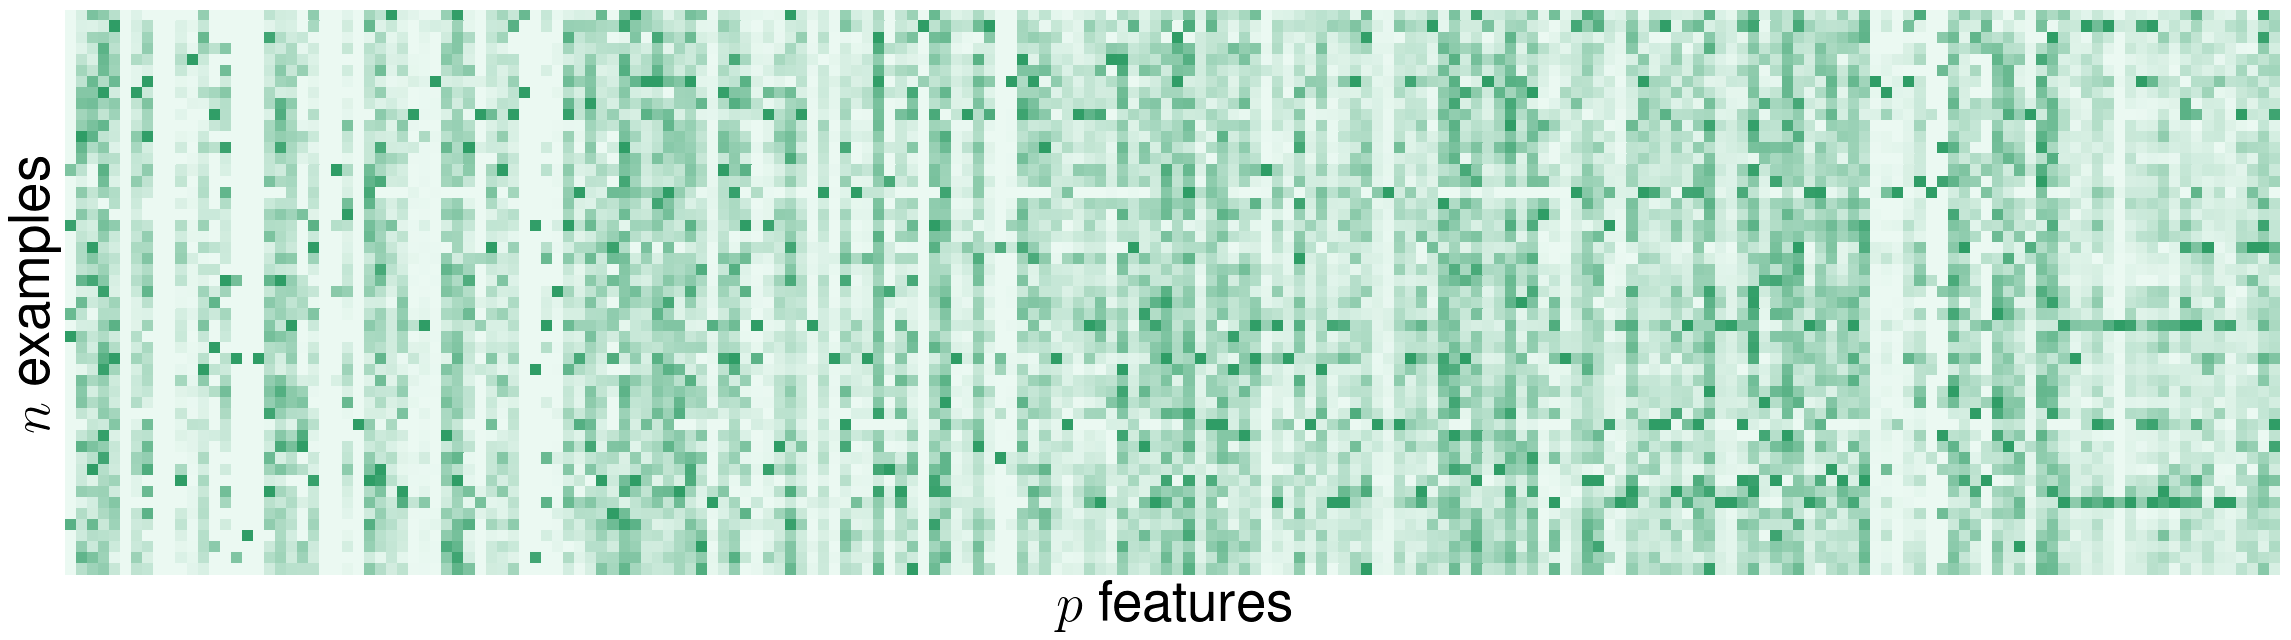

BRCA


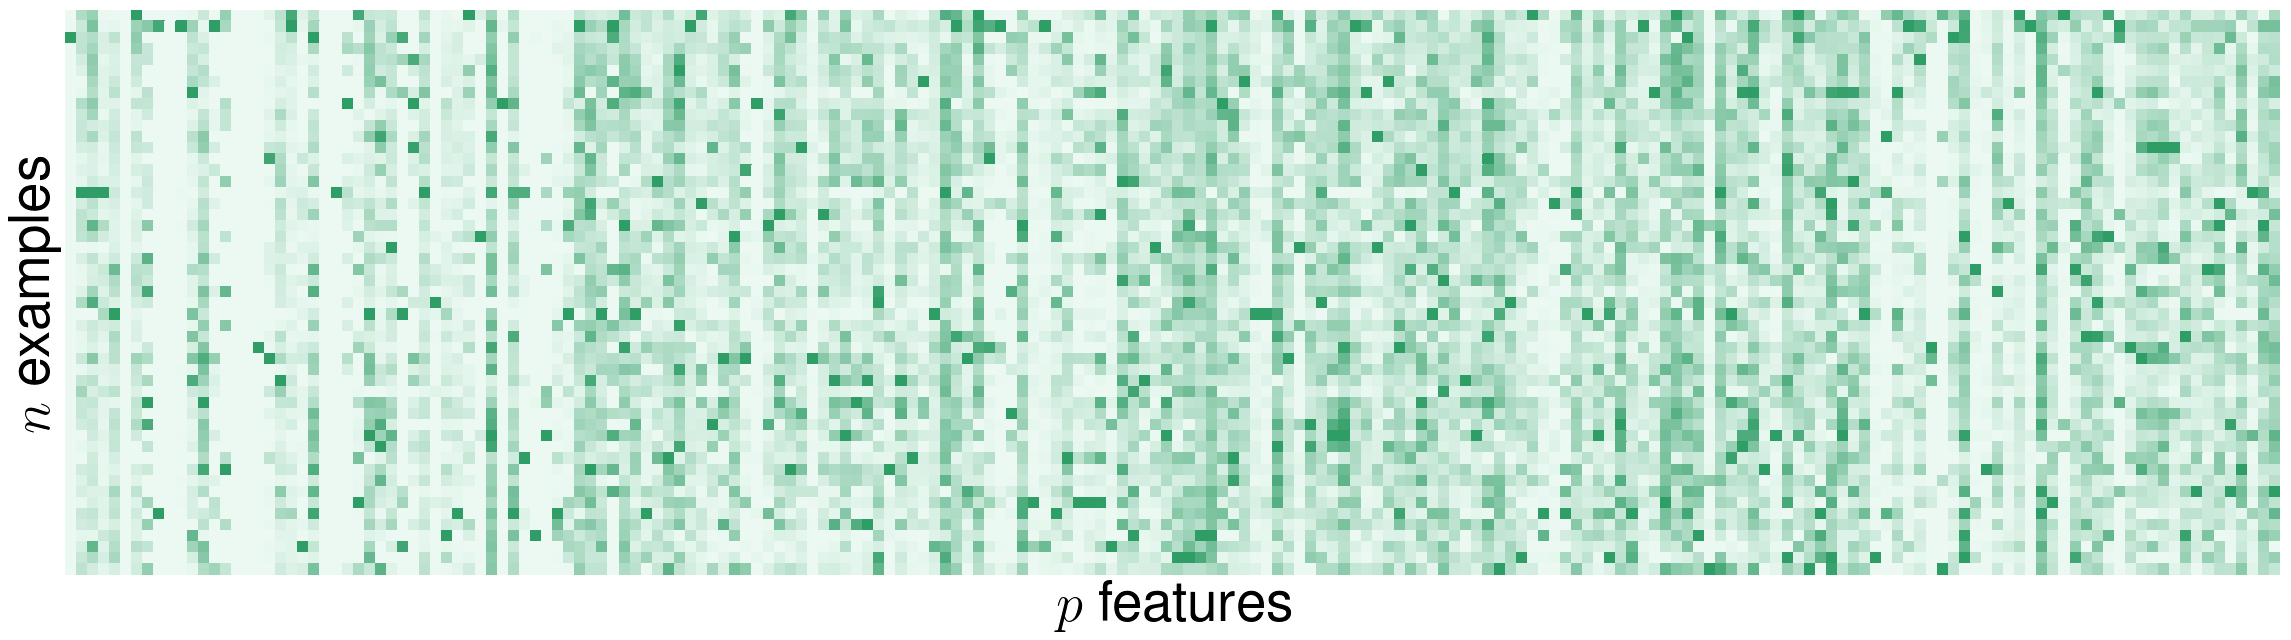

In [4]:
for cancer in cancers:
    print(cancer)
    X = data[cancer]    
    X = X.ix[:50, :200]
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    f, ax = pl.subplots(figsize=(60, 9))
    cmap = sns.light_palette("#2f9d66", as_cmap=True)
    g = sns.heatmap(X, cmap=cmap, mask=np.zeros_like(X, dtype=np.bool),
                    square=True, cbar=False, xticklabels=0, yticklabels=0)
    pl.xlabel(r'$p$ features', fontsize=55)
    pl.ylabel(r'$n$ examples', fontsize=55)
    pl.tight_layout()
    pl.savefig('./figures/data_%s.pdf' % cancer, bbox_inches='tight')
    pl.show()